In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

In [2]:
import torch

from config.dl_model_config import DLModelConfig

from ipsqt.prediction.dl.dl_predictor import DLClassifier as Predictor
from ipsqt.prediction.dl.models.lstm import LSTMClassifier as Model
from ipsqt.strategies.predicted.momentum_reversal_strategy import (
    MomentumReversalStrategy as Strategy,
)

from run import initialize

In [3]:
REBAL_FREQ = "D"
RETRAIN = True
SAVE = True

In [4]:
preprocessor, runner = initialize()

model_config = DLModelConfig()
model_config.optimizer = torch.optim.AdamW
model_config.n_features = len(runner.available_features)
model_config.n_classes = 2

model_config.n_epochs = 20

predictor = Predictor(
    model_cls=Model,
    model_config=model_config,
    verbose=False,
)

strategy = Strategy(
    predictor=predictor,
    retrain=RETRAIN,
)

strategy_name = strategy.__class__.__name__
model_name = predictor.model.__class__.__name__

Backtest on 2013-03-24 00:00:00 to 2024-05-05 00:00:00
Num Train Iterations: 581
Num OOS Daily Points: 581


In [5]:
result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)

Computing Weights:   6%|▌         | 36/581 [00:35<08:52,  1.02it/s]


KeyboardInterrupt: 

In [6]:
result

StrategyStatistics:
* final_nav = 1.618340
* geom_avg_total_r = 0.044027
* geom_avg_xs_r = 0.030394
* std_xs_r = 0.164462
* min_xs_r = -0.149641
* max_xs_r = 0.126046
* skew = -0.071322
* kurtosis = 6.800785
* max_dd = -0.267531
* sharpe = 0.184807
* alpha_buy_hold = -0.097583
* tracking_error_buy_hold = 0.189752
* ir_buy_hold = -0.514268
* factor_loadings = {'_MKT': 0.33179043872101543}
* alpha_benchmark = -0.013592
* alpha_benchmark_pvalue = 0.984715
* tracking_error_benchmark = 0.155096
* ir_benchmark = -0.087634
* ttest_pval = 0.901134
* levene_pval = 0.757958
* timing_ability_coef = 0.231837
* timing_ability_pval = 0.034578

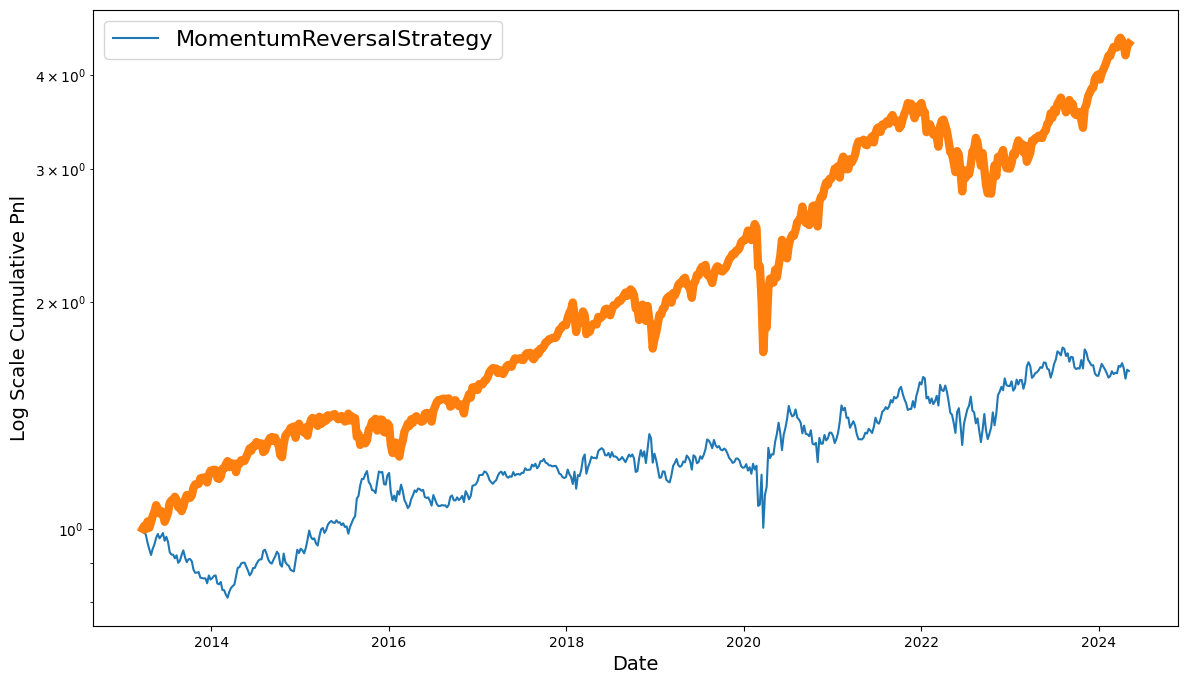

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

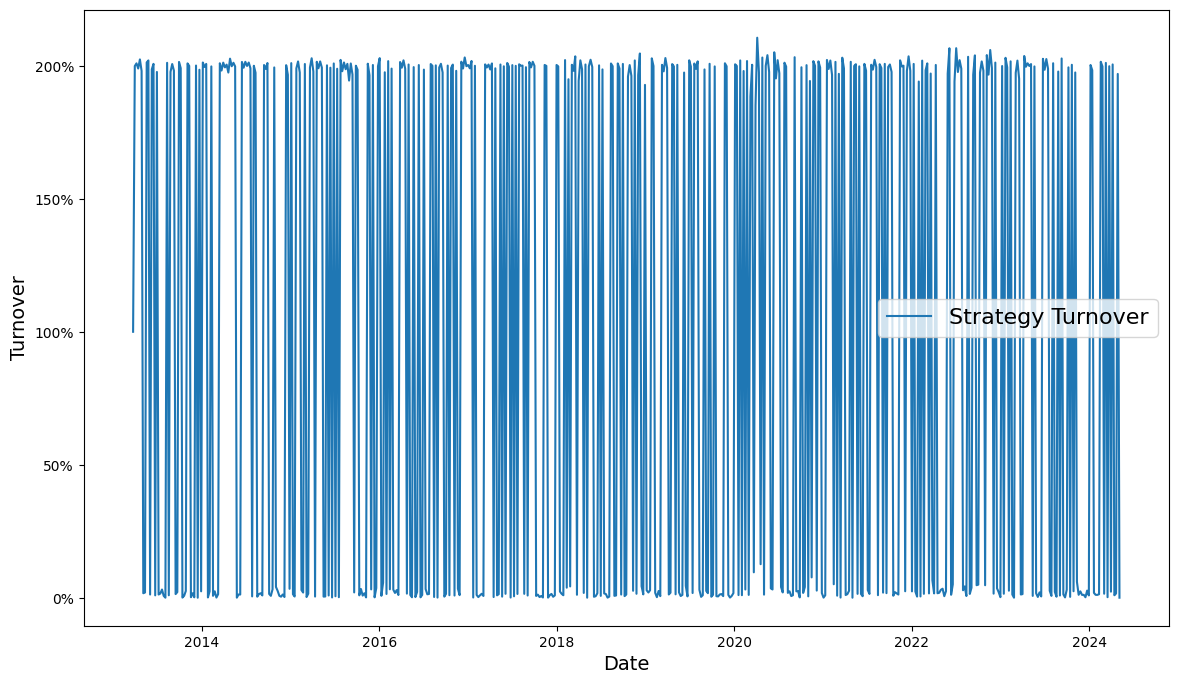

In [8]:
runner.plot_turnover()

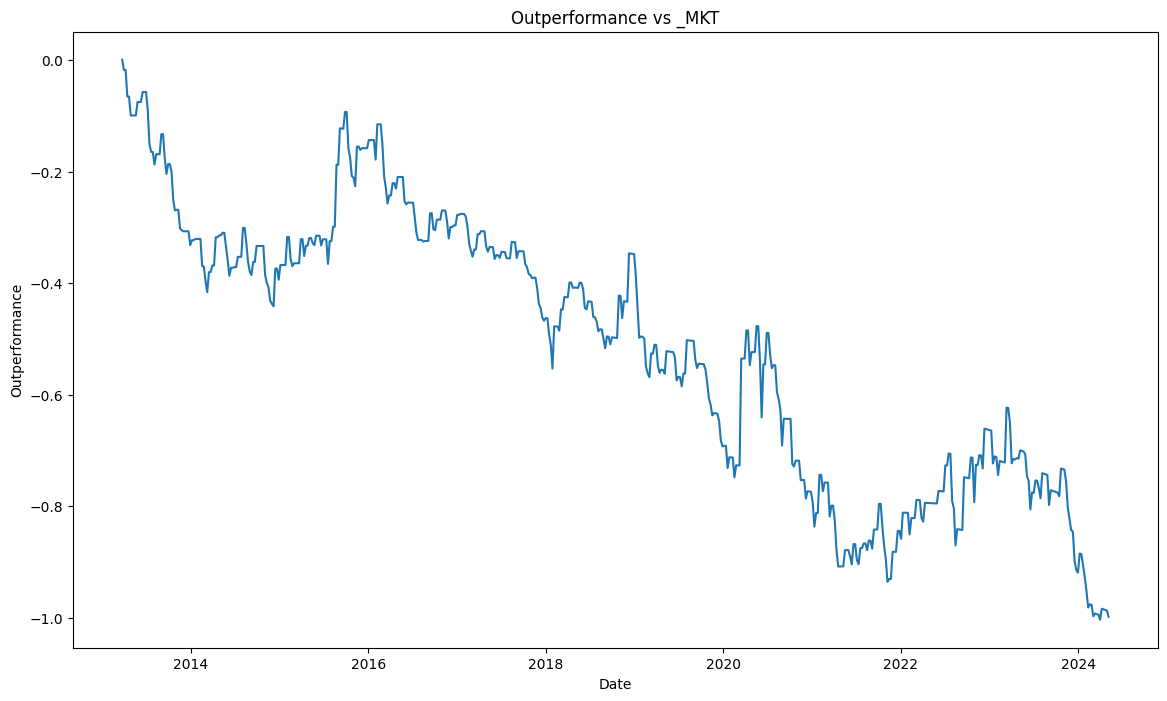

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
if SAVE:
    runner.save(f"{strategy_name}_" + model_name + f"_rebal{REBAL_FREQ}")

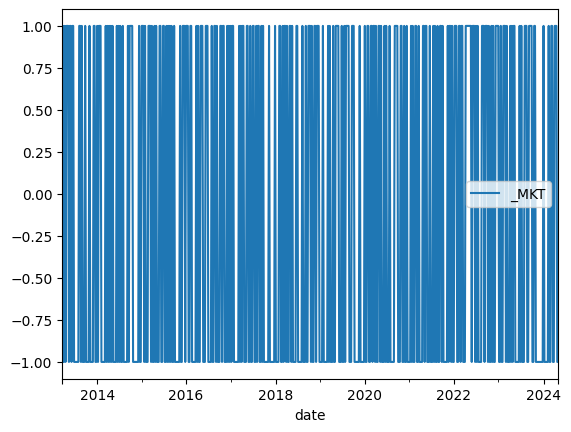

In [11]:
runner.strategy_weights.plot();

In [12]:
(
    (runner.strategy_weights == -1).mean().item(),
    (runner.strategy_weights == 1).mean().item(),
)

(0.5851979345955249, 0.41480206540447506)